<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Подготовим-данные-для-обучения" data-toc-modified-id="Подготовим-данные-для-обучения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовим данные для обучения</a></span><ul class="toc-item"><li><span><a href="#Подготовим-таргет" data-toc-modified-id="Подготовим-таргет-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовим таргет</a></span></li><li><span><a href="#Подготовим-тренировочнй-датасет" data-toc-modified-id="Подготовим-тренировочнй-датасет-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовим тренировочнй датасет</a></span><ul class="toc-item"><li><span><a href="#Соединим-датафреймы-и-добавим-таргет." data-toc-modified-id="Соединим-датафреймы-и-добавим-таргет.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Соединим датафреймы и добавим таргет.</a></span></li><li><span><a href="#Проверим-дубликаты" data-toc-modified-id="Проверим-дубликаты-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Проверим дубликаты</a></span></li><li><span><a href="#Очистим-текст" data-toc-modified-id="Очистим-текст-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Очистим текст</a></span></li><li><span><a href="#Разделим-выборку-на-тренировочную-и-валидационную" data-toc-modified-id="Разделим-выборку-на-тренировочную-и-валидационную-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Разделим выборку на тренировочную и валидационную</a></span></li></ul></li></ul></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TFIDF</a></span><ul class="toc-item"><li><span><a href="#Токинизируем-текст" data-toc-modified-id="Токинизируем-текст-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Токинизируем текст</a></span></li><li><span><a href="#Обучим-модель-LogisticRegression" data-toc-modified-id="Обучим-модель-LogisticRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим модель LogisticRegression</a></span></li><li><span><a href="#Обучим-модель-RandomForestClassifier" data-toc-modified-id="Обучим-модель-RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучим модель RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li></ul></li><li><span><a href="#Bert" data-toc-modified-id="Bert-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bert</a></span><ul class="toc-item"><li><span><a href="#Извлечем-эмбеддинги" data-toc-modified-id="Извлечем-эмбеддинги-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Извлечем эмбеддинги</a></span></li><li><span><a href="#Разделим-выборку-на-тренировочную-и-валидационную" data-toc-modified-id="Разделим-выборку-на-тренировочную-и-валидационную-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделим выборку на тренировочную и валидационную</a></span></li><li><span><a href="#Обучим-модель-LogisticRegression" data-toc-modified-id="Обучим-модель-LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучим модель LogisticRegression</a></span></li><li><span><a href="#Обучим-модель-RandomForestClassifier" data-toc-modified-id="Обучим-модель-RandomForestClassifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучим модель RandomForestClassifier</a></span></li><li><span><a href="#Обучим-модель-CatBoostClassifier" data-toc-modified-id="Обучим-модель-CatBoostClassifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обучим модель CatBoostClassifier</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итог</a></span><ul class="toc-item"><li><span><a href="#Соберем-все-в-одну-таблицу" data-toc-modified-id="Соберем-все-в-одну-таблицу-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Соберем все в одну таблицу</a></span></li><li><span><a href="#Физика" data-toc-modified-id="Физика-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Физика</a></span></li></ul></li></ul></div>

# Бинарная классификация задач Kuzovkin.info

In [17]:
# подгружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import nltk
import numpy as np
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import emoji

from tqdm.notebook import tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
from optuna.samplers import TPESampler
from transformers import AutoTokenizer, AutoModel 
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")


nltk.download('stopwords') # поддерживает удаление стоп-слов
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /Users/tanya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# константы
SEED = 42

model_name = 'cointegrated/LaBSE-en-ru'  # веса для обучения Bert
df_task = '/Users/tanya/Documents/DS/Projects/Kuzovkin_info/data-1719430924811.csv' # путь в файлу с текстом задач
df_topics = '/Users/tanya/Documents/DS/Projects/Kuzovkin_info/topics.csv' # путь к файлу со списком тем 
bert_embeddings = '/Users/tanya/Documents/DS/Projects/Kuzovkin_info/bert_embeddings.csv' # путь к эмбеддингам

## Первичный анализ

In [3]:
# датасет с задачами

try:
    df_task = pd.read_csv(df_task)
except Exception as ex: 
    print(ex)    

In [4]:
# датасет с иерархическим спиком

try:
    df_topics = pd.read_csv(df_topics)
except Exception as ex: 
    print(ex)

In [7]:
def df_info(data):
    
    '''
    Функция для первичного изучения] датасета. Нав вход принимает сам датасет, 
    на выход получаем общую информацитю о датасете.
    '''
    
    display(data.sample(10))
    display(data.info())
    print(data.duplicated().sum())
    print('Количество записпей: ', data.shape[0], 'Количество столбцов: ', data.shape[1])

In [18]:
df_info(df_task) # общая информация о датасете с текстом задач

AttributeError: 'str' object has no attribute 'sample'

In [7]:
df_info(df_topics) # общая информация о датасете со списком тем

,id,name,parent
605,606,Нормальное распределение,560
434,435,сложные дробно-рациональные неравенства,433
536,537,треугольник Рело,180
668,669,ГМТ с постоянным углом,176
115,116,Алгебраические выражения,21
231,232,Изопроцессы,229
337,338,механические волны.звук,314
484,485,подобие треугольников,484
503,504,правильные многоугольники,503
267,268,Уравнения на применение формул преобразования ...,258


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      688 non-null    int64 
 1   name    688 non-null    object
 2   parent  688 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


None

0
Количество записпей:  688 Количество столбцов:  3


__Вывод:__

1) В df_task есть значительное количество пропусков в колонках answer и text_of_solution. Так как достоверно восстановить мы их не можем, нам придется удалить эти признаки.

2) Сами тексты задач имеют специфическе символы (формулы, обозначения), русские и английские буквы. Необходимо подобрать такую модель трансформера, которая учитывала бы эти особенности.

3) В df_topics у нас иерархический список, где у каждой темы есть id родителя. Необходимо разделить все темы на два класса Математика и Физика.

## Подготовим данные для обучения

### Подготовим таргет

In [8]:
# рекурсионная функция для классификации задач

def get_parent_id(idx):
    
    '''
    Функция на вход принимает индекс задачи, для которой нужно искать родителя. 
    На выходе получаем имя верхнегг родителя 
    '''
    
    row = df_topics.loc[df_topics.id == idx, :]
    parent, name = row['parent'].values[0], row['name'].values[0]
    if parent == 0:
        return name
    return get_parent_id(parent)

def label_rows(df_topics):
    
    '''
    Функция принимает на вход весь датафрейм.
    На выходе получаем датафрейм с новой колонкой, где записаны родители верхнего уровня.
    '''
    
    df_to_label = df_topics[df_topics['parent'] != 0]
    for i in df_to_label['id'].unique():
        name = get_parent_id(i)
        df_topics.loc[df_topics.id == i, 'subject'] = name
    df_topics.loc[df_topics.subject.isna(), 'subject'] = df_topics.loc[df_topics.subject.isna(), 'name'].values
    return df_topics

In [9]:
# применяем рекурсивнную функцию
label_rows(df_topics)

,id,name,parent,subject
0,1,Математика,0,Математика
1,2,Арифметика и начала Алгебры,1,Математика
2,3,Арифметика,2,Математика
3,4,Натуральные числа,3,Математика
4,5,Cложение и вычитание натуральных чисел,4,Математика
...,...,...,...,...
683,684,теорема Пуассона,560,Математика
684,685,Первоначальные понятия математической статистики,560,Математика
685,686,Оценка вероятности по относительной частоте. Д...,685,Математика
686,687,Оценка параметров в статистике,685,Математика


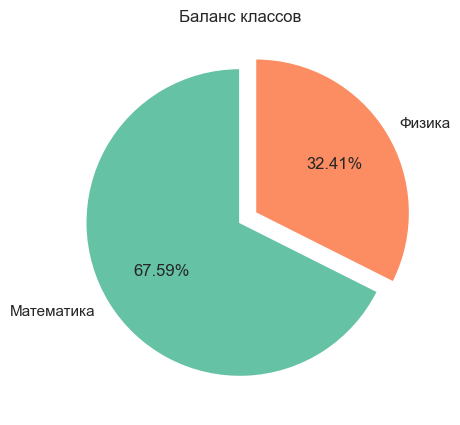

In [10]:
# граффик баланса классов
topics_counts = df_topics['subject'].value_counts()
labels=topics_counts.index
sns.set(font_scale = 1)
plt.figure(figsize=(5,5))

plt.pie(
    x=topics_counts, 
    labels=topics_counts.index,
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    startangle=90,
    explode=[0, 0.12]
)
plt.title('Баланс класcов')
plt.show()

__Вывод:__ Задач по математики а два раза больше, зем задач по физике.

### Подготовим тренировочнй датасет

#### Соединим датафреймы и добавим таргет.

In [11]:
df_info(df_task)

,id,task,answer,topics_id,text_of_solution
9603,46801,Решите уравнение: \(\sqrt{2x-4}-\sqrt{x-1}=1\).,10,70,NaN
11814,9104,Расстояние между городами A и B равно 720 км. ...,В 360,11,NaN
9840,47672,"В параллелепипеде \(A…D_{1}\) укажите векторы,...",NaN,499,NaN
20702,48889,"Какие координаты имеет точка, симметричная точ...",NaN,498,NaN
10041,48402,"Положительные числа \(x, y, z\) таковы, что: ...",NaN,489,NaN
9504,46409,При делении натурального числа п на 6 получили...,2,1,NaN
33302,13753,Найдите \(\lim_{n \to \propto} n^{\frac{3}{2}}...,-\frac{1}{4},60,\(\lim_{n \to \propto} n^{\frac{3}{2}}\left ( ...
5354,30386,Полый шар радиуса \(R\) вращается с постоянно...,NaN,410,\(\mu \geq \left ( gcos\varphi -\omega ^{2}Rsi...
33318,13795,"Найдите \(\lim_{n \to \propto} x_{n}\), воспол...",0,59,\( \lim_{n \to \propto}\frac{n*3^{n}+1}{n!+1}=...
9891,47850,Остается ли справедливой теорема о трех перпен...,NaN,569,Да


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42648 entries, 0 to 42647
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                42648 non-null  int64 
 1   task              42648 non-null  object
 2   answer            24048 non-null  object
 3   topics_id         42648 non-null  int64 
 4   text_of_solution  22678 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


None

0
Количество записпей:  42648 Количество столбцов:  5


In [12]:
# соединим два датафрейма

df_train = df_topics.merge(df_task, left_on='id', right_on='topics_id')

# уберем лишник колонки

df_train.drop(['id_x', 'name', 'parent', 'id_y', 'answer', 'topics_id', 'text_of_solution'],
              axis=1,
              inplace=True)

In [13]:
def make_target(row):
    
    '''
    Функция для определения таргета. На вход получает сам датафрейм. 
    На выходе, столбец с таргетом. 
    Математика - таргет 1. Физика - таргет 0. 
    '''
    
    try:
        if row.subject == 'Математика':
            return 1
        else:
            return 0
    except:
        pass

In [14]:
# применим функцию по добавлению таргета
df_train['target'] = df_train.apply(make_target, axis='columns')

#### Проверим дубликаты

In [15]:
# количество дубликатов в данных
df_train.duplicated().sum()

# удалим дубликаты
df_train.drop_duplicates(inplace=True)

#### Очистим текст

In [16]:
# Выполню очистку текста и лемматизирую его. 
disabled_pipes = ['parser', 'ner']
nlp = spacy.load('ru_core_news_sm', disable=disabled_pipes)
#nlp = spacy.load('ru_core_news_sm')


def clean_text(sentence): 
    
    '''
    Функция очистки текста.
    На вход получает не очищенных текст.
    На выходе получаем очищенный текст
    '''
    
    sentence = re.sub('[^А-Яа-яёЁA-Za-z]', ' ', sentence).lower()
    sentence = re.sub('\s+', ' ', sentence).strip()
    sentence = nltk.word_tokenize(sentence, language='russian')
    return sentence

def lemmtext(text): 
    
    '''
    Функция лемметезации текста
    На вход получает очищенный текст.
    На выходе лемметизированныцй текст
    '''
    
    doc = nlp(text)

    return ' '.join([token.lemma_ for token in doc])

In [17]:
tqdm.pandas()
df_train['clean_text'] = df_train['task'].progress_apply(clean_text) # очистка текста для train

  0%|          | 0/39887 [00:00<?, ?it/s]

In [18]:
tqdm.pandas()
df_train['lemm_text'] = df_train['clean_text'].progress_apply(lemmtext) # лемм. текста для train

  0%|          | 0/39887 [00:00<?, ?it/s]

In [19]:
display(df_train)

,subject,task,target,clean_text,lemm_text
0,Математика,Равносильны ли уравнения: \(cosx=0\) и \(sin^2...,1,равносильны ли уравнения cosx и sin x,равносильный ли уравнение cosx и sin x
1,Математика,Равносильны ли уравнения: \(\frac{log_x(x+1)}{...,1,равносильны ли уравнения frac log x x log x и ...,равносильный ли уравнение frac log x x log x и...
2,Математика,Равносильны ли уравнения: \(\frac{x+3}{x+3}=1\...,1,равносильны ли уравнения frac x x и frac x x,равносильный ли уравнение frac x x и frac x x
3,Математика,Равносильны ли уравнения: \(log_{x^2}x^2=1 \) ...,1,равносильны ли уравнения log x x и log xx,равносильный ли уравнение log x x и log xx
4,Математика,Какое из двух уравнений является следствием др...,1,какое из двух уравнений является следствием др...,какой из два уравнение являться следствие друг...
...,...,...,...,...,...
42643,Математика,"Найдите минимальный объем выборки, при котором...",1,найдите минимальный объем выборки при котором ...,найти минимальный объём выборка при котором с ...
42644,Математика,"Найдите минимальный объем выборки, при котором...",1,найдите минимальный объем выборки при котором ...,найти минимальный объём выборка при котором с ...
42645,Математика,Лабораторная работа № 3. Задание: Проведите из...,1,лабораторная работа задание проведите измерени...,лабораторный работа задание проведите измерени...
42646,Математика,Из большой партии изготовленных деталей по выб...,1,из большой партии изготовленных деталей по выб...,из большой партия изготовленных деталь по выбо...


#### Разделим выборку на тренировочную и валидационную

In [20]:
X_train, X_val, y_train, y_val = train_test_split(df_train['lemm_text'], 
                                                df_train['target'], 
                                                test_size=0.25, 
                                                random_state=SEED,
                                                stratify=df_train['target'])

In [21]:
# проверим размерность полученых переменых

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(29915,)
(29915,)
(9972,)
(9972,)


__Вывод:__ Подготовили выборку для обучения модели.
 - добавили таргет к текстам задач и удалили лишние признаков
 - очистили текс задач от пробелов, убрали лишние символы. Слова лемматизацировали.
 - разделили выборку на тренировочную и валидационную

## TFIDF

### Токинизируем текст

In [22]:
# задаем стоп слова
stop_words = stopwords.words('russian') # выбираем английские слова
tf_idf = TfidfVectorizer(stop_words=stop_words, dtype=np.float32) # создадим класс для созднания векторов tfidf

In [23]:
%%time
# приобразуем текст в векторное значение на тренировочной выборке
train_tf_idf = tf_idf.fit_transform(X_train)

CPU times: user 1.14 s, sys: 36.7 ms, total: 1.18 s
Wall time: 1.5 s


In [24]:
%%time
# приобразуем текст в векторное значение на тренировочной выборке
val_tf_idf = tf_idf.transform(X_val)

CPU times: user 321 ms, sys: 5.89 ms, total: 327 ms
Wall time: 326 ms


### Обучим модель LogisticRegression

In [25]:
dense_train = train_tf_idf.todense()
dense_train = pd.DataFrame(dense_train)

In [26]:
dense_val = val_tf_idf.todense()
dense_val = pd.DataFrame(dense_val)

In [27]:
%%time
def objective(trial):    
    # Список гиперпараметров для перебора
    param = {
        'C': trial.suggest_float('C', 1, 15),
    }
                                
     # Определяю модель машинного обучения, которой передаются гиперпараметры
    estimator = LogisticRegression(**param, 
                                   n_jobs=-1,
                                   class_weight='balanced',
                                   random_state=SEED,
                                   solver='lbfgs',
                                   max_iter=50)

    # Обучим модель        
    estimator.fit(dense_train, y_train)
    
    # Вычисляем accuracy
    
    return cross_val_score(estimator, dense_val, y_val, cv=3, scoring= 'accuracy').mean()

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 16 µs


In [28]:
%%time
# Подбираем гиперпараметров
#sampler = TPESampler(consider_prior=True, multivariate=True, group=True)
#optuna_logreg = optuna.create_study(study_name='LogReg', direction='maximize', sampler=sampler)
# Запускаем процесс подбора гиперпараметров
#optuna_logreg.optimize(objective, n_trials=5, n_jobs=-1, show_progress_bar=True)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


In [29]:
#accuracy = round(optuna_logreg.best_value, 2)
#print('LogisticRegression accuracy: ', accuracy)
#print()
#print('Best_params: ', optuna_logreg.best_params)

Подбор гиперпараметров занимает много времени, поэтому записала подобранные параметры сразу.

In [30]:
%%time
# инициируем модель LogisticRegression
model_lr = LogisticRegression(C=5, \
                                    solver='lbfgs', 
                                    max_iter=50,
                                    n_jobs=-1,
                                    random_state=SEED)

model_lr.fit(train_tf_idf, y_train) # обучим модель

/Users/tanya/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, max_iter=50, n_jobs=-1, random_state=42)

In [31]:
predict_lr = model_lr.predict(val_tf_idf) # предсказания на валидационной выборке
print(classification_report(y_val, predict_lr)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3736
           1       0.99      0.99      0.99      6236

    accuracy                           0.99      9972
   macro avg       0.99      0.99      0.99      9972
weighted avg       0.99      0.99      0.99      9972



### Обучим модель RandomForestClassifier

In [32]:
%%time
def objective(trial):
    # Список гиперпараметров для перебора
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }
    
    # Определяю модель машинного обучения, которой передаются гиперпараметры
    estimator = RandomForestClassifier(random_state=SEED, n_jobs=-1, **param)
    
    # Добавим пайплайн
  
    estimator.fit(dense_train, y_train)
    
    # Вычисляем accuracy_score
    
    return cross_val_score(estimator, dense_val, y_val, cv=3, scoring= 'accuracy').mean()

CPU times: user 345 µs, sys: 232 µs, total: 577 µs
Wall time: 533 µs


In [33]:
%%time
# Подбираем гиперпараметров
#sampler = TPESampler(consider_prior=True, group=True, multivariate=True) 
#optuna_rf = optuna.create_study(study_name='RF', direction="maximize", sampler=sampler)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.2 µs


In [34]:
%%time
# Запускаем процесс подбора гиперпараметров
#optuna_rf.optimize(objective, n_trials=5, n_jobs=-1, show_progress_bar=True)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.1 µs


Trial 0 finished with value: 0.8875852386682711 and parameters: {'n_estimators': 154, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8875852386682711.

In [35]:
#accuracy = round(optuna_rf.best_value, 2)
#print('RandomForestClassifier accuracy: ', accuracy)
#print()
#print('Best_params: ', optuna_rf.best_params)

In [36]:
%%time
# инициируем модель LogisticRegression
model_rf = RandomForestClassifier(random_state=SEED, 
                                  n_jobs=-1, 
                                  n_estimators = 154,
                                  criterion = 'gini', 
                                  max_depth = 5, 
                                  max_features = None,
                                  min_samples_split = 4, 
                                  min_samples_leaf = 8)

model_rf.fit(train_tf_idf, y_train) # обучим модель

CPU times: user 1min 19s, sys: 592 ms, total: 1min 20s
Wall time: 23.2 s


RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=8,
                       min_samples_split=4, n_estimators=154, n_jobs=-1,
                       random_state=42)

In [37]:
predict_rf = model_rf.predict(val_tf_idf) # предсказания на валидационной выборке
print(classification_report(y_val, predict_rf)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.97      0.73      0.84      3736
           1       0.86      0.99      0.92      6236

    accuracy                           0.89      9972
   macro avg       0.92      0.86      0.88      9972
weighted avg       0.90      0.89      0.89      9972



### CatBoostClassifier

In [38]:
def objective(trial):    
    # Список гиперпараметров для перебора
    param = {
        'depth': trial.suggest_int('depth', 1, 12),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 7),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'border_count': trial.suggest_int('border_count', 5, 20),
        'thread_count': trial.suggest_int('thread_count', 3, 4),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 9, 10),
        'random_strength': trial.suggest_float('random_strength', 0.01, 1),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 1, 3)
    }
                                
    # Определяю модель машинного обучения, которой передаются гиперпараметры
    estimator = CatBoostClassifier(**param, verbose=False, loss_function='Logloss')

    # Добавим пайплайн
  
    estimator.fit(dense_train, y_train)
    
    # Вычисляем accuracy_score
    
    return cross_val_score(estimator, dense_val, y_val, cv=3, scoring= 'accuracy').mean()

In [39]:
%%time
# Подбираем гиперпараметров
#sampler = TPESampler(consider_prior=True, multivariate=True, group=True)
#optuna_cbc = optuna.create_study(study_name='CBC', direction="maximize", sampler=sampler)
# Запускаем процесс подбора гиперпараметров
#optuna_cbc.optimize(objective, n_trials=5, n_jobs=-1, show_progress_bar=True)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.2 µs


In [40]:
#accuracy = round(optuna_cbc.best_value, 2)
#print('CatBoostClassifier accuracy: ', accuracy)
#print()
#print('Best_params: ', optuna_cbc.best_params)

In [41]:
%%time
model_cbc = CatBoostClassifier(random_state=SEED, 
                               verbose=False, 
                               loss_function='Logloss',
                               depth=2, 
                               boosting_type='Plain', 
                               bootstrap_type='MVS', 
                               learning_rate=0.19252920921465574, 
                               l2_leaf_reg=1, 
                               iterations=427, 
                               border_count=20, 
                               thread_count=3, 
                               early_stopping_rounds=10, 
                               random_strength=0.7681898542822829, 
                               max_ctr_complexity=2)
                              
model_cbc.fit(train_tf_idf, y_train) # обучим модель

CPU times: user 35.4 s, sys: 598 ms, total: 36 s
Wall time: 16.8 s


In [42]:
predict_cbc = model_cbc.predict(val_tf_idf) # предсказания на валидационной выборке
print(classification_report(y_val, predict_cbc)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3736
           1       0.97      0.99      0.98      6236

    accuracy                           0.98      9972
   macro avg       0.98      0.97      0.97      9972
weighted avg       0.98      0.98      0.98      9972



##  Bert

### Извлечем эмбеддинги

In [43]:
%%time
# инициируем токинезатор, как обьект класса BertTokenizer и передадим словарь для обучения
tokenizer = AutoTokenizer.from_pretrained(model_name)
model =  AutoModel.from_pretrained(model_name)

CPU times: user 1.76 s, sys: 2.63 s, total: 4.4 s
Wall time: 12.2 s


In [44]:
def create_emb_text(data):
    
    '''
    Функция извлечем эмбеддинги для текста. 
    На вход получает лемматизированный текст.
    На выходе векторное представление текста.
    '''
    
    if isinstance(data, str):
        encoded_input = tokenizer(
            data, padding=True, truncation=True,
            max_length=128, return_tensors='pt'
        )

        with torch.no_grad():
            model_output = model(**encoded_input)

        token_embeddings = model_output[0]
        attention_mask = encoded_input['attention_mask']
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)

        return (sum_embeddings / sum_mask).numpy()

    else:
        tokenized = data.apply(
            lambda x: tokenizer.encode(x,
                                       add_special_tokens=True,
                                       truncation=True,
                                       max_length=128,
                                       )
        )

        max_len = max([len(x) for x in tokenized])
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized.values])
        attention_mask = np.where(padded != 0, 1, 0)

        batch_size = 100
        embeddings = []

        for i in tqdm(range(padded.shape[0] // batch_size + 1)):
            batch = torch.LongTensor(padded[batch_size * i : batch_size * (i + 1)])
            attention_mask_batch = torch.LongTensor(
                attention_mask[batch_size * i : batch_size * (i + 1)]
            )

            with torch.no_grad():
                batch_embeddings = model(batch, attention_mask=attention_mask_batch)
            embeddings.append(batch_embeddings[0][:,0,:].numpy())

        return embeddings

In [45]:
# так как процесс извлечения эмбеддингов занимает много времени, записала эмбединги в отдельный файл

try:
    bert_embeddings = pd.read_csv(bert_embeddings)
except: 
    emb = create_emb_text(df_train['lemm_text']) #запишем вектор признака в переменную
    emb_bert = np.concatenate(emb) 
    bert_embeddings = pd.DataFrame(emb_bert)

In [46]:
df_train.reset_index(inplace=True)

### Разделим выборку на тренировочную и валидационную

In [47]:
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(bert_embeddings,
                                                                      df_train['target'],                      
                                                                      test_size=0.25, 
                                                                      random_state=SEED,
                                                                      stratify=df_train['target'])

In [48]:
X_train_bert.drop(['Unnamed: 0'], axis=1, inplace=True)
X_val_bert.drop(['Unnamed: 0'], axis=1, inplace=True)

In [49]:
# проверим размерность

print(X_train_bert.shape)
print(y_train_bert.shape)
print(X_val_bert.shape)
print(X_val_bert.shape)

(29915, 768)
(29915,)
(9972, 768)
(9972, 768)


### Обучим модель LogisticRegression

In [50]:
%%time
# инициируем модеь
model_lr = LogisticRegression(C=5, \
                                    solver='lbfgs', 
                                    max_iter=1000,
                                    n_jobs=-1,
                                    random_state=SEED)

model_lr.fit(X_train_bert, y_train_bert) # обучим модель

/Users/tanya/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, max_iter=1000, n_jobs=-1, random_state=42)

In [51]:
predict_lr_bert = model_lr.predict(X_val_bert) # предсказания на валидационной выборке
print(classification_report(y_val_bert, predict_lr_bert)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3736
           1       0.99      0.99      0.99      6236

    accuracy                           0.98      9972
   macro avg       0.98      0.98      0.98      9972
weighted avg       0.98      0.98      0.98      9972



### Обучим модель RandomForestClassifier

In [52]:
%%time
# инициируем модель LogisticRegression
model_rf = RandomForestClassifier(random_state=SEED, 
                                  n_jobs=-1, 
                                  n_estimators = 154,
                                  criterion = 'gini', 
                                  max_depth = 5, 
                                  max_features = None,
                                  min_samples_split = 4, 
                                  min_samples_leaf = 8)

model_rf.fit(X_train_bert, y_train_bert) # обучим модель

CPU times: user 1h 4min 23s, sys: 14.3 s, total: 1h 4min 37s
Wall time: 20min 1s


RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=8,
                       min_samples_split=4, n_estimators=154, n_jobs=-1,
                       random_state=42)

In [53]:
predict_rf_bert = model_rf.predict(X_val_bert) # предсказания на валидационной выборке
print(classification_report(y_val_bert, predict_rf_bert)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3736
           1       0.94      0.93      0.94      6236

    accuracy                           0.92      9972
   macro avg       0.92      0.92      0.92      9972
weighted avg       0.92      0.92      0.92      9972



### Обучим модель CatBoostClassifier

In [56]:
%%time
model_cbc = CatBoostClassifier(random_state=SEED, 
                               verbose=False, 
                               loss_function='Logloss',
                               depth=2, 
                               boosting_type='Plain', 
                               bootstrap_type='MVS', 
                               learning_rate=0.19252920921465574, 
                               l2_leaf_reg=1, 
                               iterations=427, 
                               border_count=20, 
                               thread_count=3, 
                               early_stopping_rounds=10, 
                               random_strength=0.7681898542822829, 
                               max_ctr_complexity=2)

model_cbc.fit(X_train_bert, y_train_bert) # обучим модель

CPU times: user 39.5 s, sys: 239 ms, total: 39.7 s
Wall time: 14.5 s


In [57]:
predict_cbc_bert = model_cbc.predict(X_val_bert) # предсказания на валидационной выборке
print(classification_report(y_val_bert, predict_cbc_bert)) # посчитаем метрику

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3736
           1       0.99      0.99      0.99      6236

    accuracy                           0.98      9972
   macro avg       0.98      0.98      0.98      9972
weighted avg       0.98      0.98      0.98      9972



##  Итог

### Соберем все в одну таблицу

In [58]:
# соберем результаты в таблицу
model_name = ['LogisticRegression + TFIDF',\
              'RandomForestClassifier + TFIDF', 
              'CatBoostClassifier + TFIDF',
              'LogisticRegression + BERT',
              'RandomForestClassifier + BERT', 
              'CatBoostClassifier + BERT']

accuracy = [round(accuracy_score(y_val, predict_lr), 2), 
            round(accuracy_score(y_val, predict_rf), 2), 
            round(accuracy_score(y_val, predict_cbc), 2), 
            round(accuracy_score(y_val_bert, predict_lr_bert), 2), 
            round(accuracy_score(y_val_bert, predict_rf_bert), 2), 
            round(accuracy_score(y_val_bert, predict_cbc_bert), 2)]

result = pd.DataFrame({'Model': model_name,
                        'accuracy': accuracy})
display(result)

,Model,accuracy
0,LogisticRegression + TFIDF,0.99
1,RandomForestClassifier + TFIDF,0.89
2,CatBoostClassifier + TFIDF,0.98
3,LogisticRegression + BERT,0.98
4,RandomForestClassifier + BERT,0.92
5,CatBoostClassifier + BERT,0.98


__Вывод:__ 

Нами была протестированная модель LogisticRegression, RandomForestClassifier, CatBoostClassifier на данных с векторизацией текста двумя способами TfidfVectorizer и  BertTokenizer. С помощью optuna подобрали параметры для обучения.

Лучше всего тебя показала модель LogisticRegression с векторизацией текста TfidfVectorizer. Удалось добиться метрики accuracy=0.99. Рекомендую ее использовать в дальнейшем для классификации задач. Так же время затраченное на работу этой модели оказалось самым минимальным.

### Физика